# 1. 일반해밍수 (2점)

5형 일반해밍(Hamming)수는 5보다 큰 소수 인수가 없는 자연수입니다.
첫 몇 해밍 수는 1, 2, 3, 4, 5, 6, 8, 9, 10, 12, 15입니다.

n보다 큰 소수 인수가 없는 자연수를 n형 일반 해밍 수라고 하면,
앞서의 해밍 수는 5형 일반 해밍 수입니다.

10,000 이하에서, 50형 일반해밍수 중에 두번째로 큰 수를 출력하시오. 


In [50]:
limit = 10000
n = 50
def compute():
	LIMIT = 10000
	primes = [2,3,5,7,11,13,17,19,23,29,31,37,41,43,47,53,59,61,67,71,73,79,83,89,97]

	
	def count(primeindex, product):
		if primeindex == len(primes):
			return 1 if product <= LIMIT else 0
		else:
			result = 0
			while product <= LIMIT:
				result += count(primeindex + 1, product)
				product *= primes[primeindex]
			return result
	
	return str(count(0, 1))


if __name__ == "__main__":
	print(compute())

3716


# 2. 정규식 (2점)
정규식을 이용하여  첨부의 input.txt 파일에서 찾아, 
다음 형식과 조건을 만족시키는 문자열을 찾아 출력하시오.

o 형식: mm/dd/yyyy
o 조건: 1900~2021년 사이의 날짜만 출력하도록 한다.
o 단,월별 최종날짜는 28, 30, 31인지는 구분하지 않고, 31일 이하로 체크한다. 
o 예) 
  03/24/1995 : 출력
  05/15/2021 : 출력
  13/23/2011 : 미출력, 13월은 없음. 
  12/23/2022 : 미출력, 2022년

In [6]:
import re
f = open('input-re.txt','r')
data = f.read()
p = re.compile('(0[1-9]|1[0-2])/([0-2]\d|3[01])/(1[0-9][0-9][0-9]|20[0-2][0-1])',re.MULTILINE)
a = p.findall(data)
print(a)

[('11', '21', '2011'), ('12', '11', '1999')]


# 3. Numpy + gplotlib (3점)

다음과 같이 한번에 [-2~+2] 사이의 정수만큼 한번에 계단을 랜덤확률로 오르내린다. 
계단높이 5에서 시작하여, 다음 조건과 같이 10회의 계단 오르내리기를 할 경우, 
다음 질문에 답하라. 

o 조건: 

 - 두계단상승(+2), 한계단상승(+1), 제자리(0), 한계단하락(-1), 두계단하락(-2)
 
o 채점의 편의를 위하여 np.random.seed(100) 을  수행하여, 
  np.random.randint 함수가 [-2,+2] 사이의 동일한 난수정수들을 
  만들어 내도록 하고, 이를 누적하여 계단위치의 변화를 만들어, 
  이를 matplotlib를 활용하여 회차별 현재 계단위치를 꺽은선 그래프로 표시하라. 

예) 두개의 난수가 -1, 2 이 생성됬을 경우, 계단의 위치변화는 5, 4, 6 임

o (주의) 첫 계단의 시작위치는 5에서 시작하여, 
  총 11번의 계단위치값을 y 값으로 표시하는 그래프를 표시한다. 

o (힌트) cumsum 함수를 이용하면 현재의 위치를 쉽게 구할 수 있다. 

o 해답 그래프 
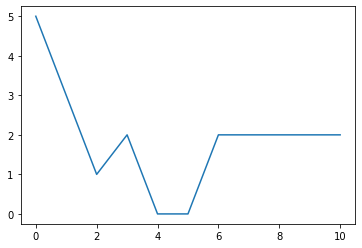

[5, array([3]), array([1]), array([2]), array([3]), array([4]), array([5]), array([3]), array([3]), array([3]), array([1])]


/Users/jay/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


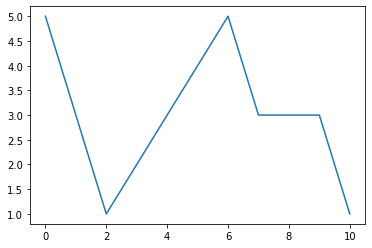

In [54]:
# 답
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(100)
nsteps = 10
step = 5
list1 =[5,]
for i in range(nsteps):
    step = step + np.random.randint(-2,2)
    list1.append(np.cumsum(step))
plt.plot(list1)

# 4. Pandas (2점)
다음은 주별 음식재료 소비량을 나타내는 DataFrame이다. 

주별 음식재료 소비량의 합을 구하라. 

In [3]:
from pandas import DataFrame
import numpy as np
np.random.seed(100)
df = DataFrame(np.random.rand(12).reshape((4,3)), columns=['corn', 'rice', 'meat'],
                index=['Utah', 'Ohio', 'Texas', 'Oregon'])
df

,corn,rice,meat
Utah,0.543405,0.278369,0.424518
Ohio,0.844776,0.004719,0.121569
Texas,0.670749,0.825853,0.136707
Oregon,0.575093,0.891322,0.209202


In [4]:
#답
df1 = df.sum(axis=1)
df1

Utah      1.246292
Ohio      0.971064
Texas     1.633308
Oregon    1.675617
dtype: float64